# Prediction of the Crypto Market Cap Growth

This notebook serves as an analysis tool for the Crypto market. It explores a 24-hour updating [dataset](https://www.kaggle.com/datasets/adrianjuliusaluoch/crypto-and-stock-market-data-for-financial-analysis) to approximate the deviation in exchange and understand the market growth trajectory.

# Project Overview

- **Data Analysis**: Analyse the dataset, display graphs to understand relationships and split the data for training and testing.
- **Cross validation**: test the model using Time Series Cross-validation and visualise its performance on new data.
- **Model training and evaluation**: Train the model on the training data.
- **Visualisation**: visualise the resulsts across testings to compare the predictions's accuracy.

# Polynomial Regression

## Recap: what is a polynomial?

In mathematics, a polynomial is a mathematical expression consisting of indeterminates (also called variables) and coefficients, that involves only the operations of addition, subtraction, multiplication and exponentiation to nonnegative integer powers, and has a finite number of terms. An example of a polynomial of a single indeterminate $x$ is $P(X)=x²-4x+7$. With three indeterminates: $P(X)=x^{3}+2xyz^{2}-yz+1$.

The order/degree of a polynomial is the value of its biggest power: A polynomial of order 2 can constist of at most power 2 variables: $P(X)=x + 4x²$. It's not necessary for all the powers of $x$ to be present. We can have a singular (not very useful) variable polynomial ($\alpha * x²$) and still be called an order 2 polynomial.

## The math behind Polynomial Regression:

In statistics, it is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as a polynomial $y=P(X)$. Therefore, the model won't be able to fit a non linear data as it will fail to understand the relationships between data points resulting from $n$-power polynomials.

At a mathematical level, a ploynomial regression should look like this:

$$y = \beta₀ + \beta₁x + \beta₂x² + \beta₃x³ + … + \betaₙxⁿ + \epsilon$$

Where:
- $y$ -> Dependent variable (what you’re predicting).
- $x$ -> Independent variable (your input).
- $\beta₀, \beta₁, \beta₂, …, \betaₙ$ -> Coefficients for each degree of $x$.
- $x², x³, …, xⁿ$: higher-order terms that add more flexibility.
- $\epsilon$ -> The error/risidual term from calculations.

## Key terms:

* **Outlier**: An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

* **Underfitting**: When your model is too simple to capture the underlying pattern in the data. Imagine trying to fit a straight line to a dataset that clearly follows a curve. Linear regression, while simple, can suffer from underfitting when the relationship isn’t linear.

* **Overfitting**: It occurs when your model is too complex, capturing every tiny fluctuation in the data, including noise. This might make your training performance look stellar, but when new data comes along, the model falls apart.

## Comparison with Linear model

<center>
    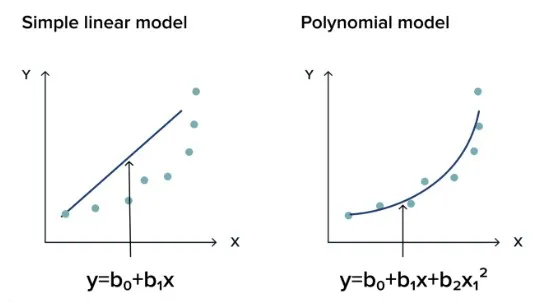
</center>
<br>

At its core, polynomial regression is an extension of linear regression. But some differences are present making it more suitable for real world scenarios:

|                     	| Polynomial Regression           	| Linear Regression                                	|
|-----------------------|-----------------------------------|---------------------------------------------------|
| Type of data to use 	| Unstable data                   	| Linear data. Assumes a constant rate of change.  	|
| Graph shape         	| Curves                          	| Straight line                                    	|
| Complexity          	| Complex to read and manipulate. 	| Easier to read, understand and lighter to compute |

## Use-cases

Thanks to its flexibility, polynomial regression can easily handle real world data. A modal fit for constant change with non linear progression.

Polynomial regression finds its way in various real world scenarios, including but not limited to:
- **Finance**: modeling stock trends.
- **Health-care**: predicting growth patterns.
- **Manufacturing**: analysing system performance curves.

## Pros and pitfalls
**Pros:**
- **Flexibility**: Can model a wide range of relationships.
- **Better Fit**: Can capture non-linear trends in the data.
- **Varied applicability**: Thanks to its flexible nature, we can explore a wide range of fields with volatile behavior.

**Pitfalls:**
- **Computational Complexity**: As the degree of the polynomial increases, so does the computational cost.
- **Overfitting & Underfitting**: Prone to overfitting with higher-degree polynomials and underfitting with low-degrees. Therefore we need cross validation to reduce errors.
- **Sensitivity to Outliers**: More sensitive to outliers compared to linear regression.

# Environment Preparation

In [1]:
# Libraries installation
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries (just check the correctness of the import by showing the version)
import pandas as pd
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy as scp

print(f"Pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {mtb.__version__}")
print(f"seaborn version: {sb.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scp.__version__}")

Pandas version: 2.3.2
numpy version: 2.3.3
matplotlib version: 3.10.6
seaborn version: 0.13.2
scikit-learn version: 1.7.2
scipy version: 1.16.2


In [3]:
# Load dataset (show data shape, print first n lines of the data)

data = pd.read_csv("data/stocks.csv")

In [4]:
print(f"data Shape = {data.shape}")

data Shape = (135328, 9)


In [5]:
# Printing the first N lines of the data
n = 10
print(f"First {n} lines of the data")
data.head(n)

First 10 lines of the data


,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-09-18 02:00:00,Boeing,214.68,218.05,213.13,-0.34,-0.16%,5.31M,15:59:59
1,2025-09-18 02:00:00,Chevron,160.10,160.67,158.61,0.56,+0.35%,4.02M,15:59:59
2,2025-09-18 02:00:00,Citigroup,101.76,102.21,100.41,1.12,+1.11%,13.61M,15:59:59
3,2025-09-18 02:00:00,Caterpillar,450.62,452.34,443.00,9.95,+2.26%,4.31M,15:59:59
4,2025-09-18 01:30:00,Walt Disney,116.11,116.66,115.22,0.88,+0.76%,5.57M,15:59:59
5,2025-09-18 01:30:00,Cisco,67.72,67.88,66.38,0.79,+1.18%,17.52M,15:59:59
6,2025-09-18 01:30:00,Goldman Sachs,794.22,798.57,785.23,8.69,+1.11%,1.79M,15:59:59
7,2025-09-18 01:30:00,JPMorgan,311.75,312.91,308.77,2.56,+0.83%,8.41M,15:59:59
8,2025-09-18 01:30:00,Coca-Cola,67.04,67.13,66.41,0.80,+1.20%,12.43M,15:59:59
9,2025-09-18 01:30:00,McDonald’s,305.00,306.58,303.91,1.71,+0.56%,2.59M,15:59:59


# Data Analysis

In [6]:
# Clean and process data (show data shape)

In [7]:
# Get dataframe columns:
print(f"Dataframe columns: {data.columns}\n")

# Renaming the chg_, chg_% and vol_ columns to make them more readable:
updated_cols = {'chg_': 'change','chg_%': 'change_percentage','vol_': 'volume'}

# Ommit the 'inplace' argument to get a copy of the original dataframe with updated columns.
data.rename(columns=updated_cols, inplace = True)

def process_percentage(v: str) -> float:
    try:
        new = v.replace('%', '').replace('+', '')
    
        return float(new)
    except:
        return v

def process_volume(v: str) -> float:
    try:
        new = v.replace('M', '').replace('K', '')
    
        return float(new)
    except:
        return v

data['change_percentage'] = data['change_percentage'].apply(lambda x: process_percentage(x))
data['volume'] = data['volume'].apply(lambda x: process_volume(x))

print("Visualising the new data with updated columns and cleaned rows:")
data.head(5)


Dataframe columns: Index(['timestamp', 'name', 'last', 'high', 'low', 'chg_', 'chg_%', 'vol_',
       'time'],
      dtype='object')

Visualising the new data with updated columns and cleaned rows:


,timestamp,name,last,high,low,change,change_percentage,volume,time
0,2025-09-18 02:00:00,Boeing,214.68,218.05,213.13,-0.34,-0.16,5.31,15:59:59
1,2025-09-18 02:00:00,Chevron,160.10,160.67,158.61,0.56,0.35,4.02,15:59:59
2,2025-09-18 02:00:00,Citigroup,101.76,102.21,100.41,1.12,1.11,13.61,15:59:59
3,2025-09-18 02:00:00,Caterpillar,450.62,452.34,443.00,9.95,2.26,4.31,15:59:59
4,2025-09-18 01:30:00,Walt Disney,116.11,116.66,115.22,0.88,0.76,5.57,15:59:59


In [8]:
# Removing Nan values:
print(f"OLD data Shape = {data.shape}")

data.dropna()

print(f"NEW data Shape = {data.shape}")

OLD data Shape = (135328, 9)
NEW data Shape = (135328, 9)


In [9]:
# Extract numeric columns and convert to numpy arrays
numeric_columns = ['last', 'high', 'low', 'change', 'change_percentage', 'volume']
names = data['name'].values  # NumPy array of stock names

# Create numpy arrays from DataFrame columns
last_prices = data['last'].values
high_prices = data['high'].values
low_prices = data['low'].values
changes = data['change'].values
change_percentages = data['change_percentage'].values
volumes = data['volume'].values

# Combine all numeric data into a 2D numpy array
numeric_data = np.column_stack([last_prices, high_prices, low_prices, changes, change_percentages, volumes])
feature_names = np.array(['last', 'high', 'low', 'change', 'change_percentage', 'volume'])

# Create DataFrame for seaborn compatibility
data_numeric = pd.DataFrame(numeric_data, columns=feature_names, index=names)


print(f"Original DataFrame shape: {data.shape}")
print(f"Numeric data shape: {numeric_data.shape}")
print(f"Features: {feature_names}")
print(f"Stock names: {names}")
print(f"\nFirst few rows of numeric data:")
data_numeric.head()

Original DataFrame shape: (135328, 9)
Numeric data shape: (135328, 6)
Features: ['last' 'high' 'low' 'change' 'change_percentage' 'volume']
Stock names: ['Boeing' 'Chevron' 'Citigroup' ... 'Coca-Cola' 'P&amp;G' 'Nike']

First few rows of numeric data:


,last,high,low,change,change_percentage,volume
Boeing,214.68,218.05,213.13,-0.34,-0.16,5.31
Chevron,160.10,160.67,158.61,0.56,0.35,4.02
Citigroup,101.76,102.21,100.41,1.12,1.11,13.61
Caterpillar,450.62,452.34,443.00,9.95,2.26,4.31
Walt Disney,116.11,116.66,115.22,0.88,0.76,5.57


In [10]:
# Data visualisation (histogramm, pair plot, box plot, corralation heatmap, feature distrubion)

plt.style.use('default')
sb.set_palette("husl")

In [ ]:
# 4. Correlation Heatmap

plt.figure(figsize=(12, 9))

# Calculate correlation matrix using numpy
correlation_matrix = np.corrcoef(numeric_data.T)  # Transpose to get feature correlation

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

# Create DataFrame for seaborn heatmap

corr_data = pd.DataFrame(correlation_matrix, index=feature_names, columns=feature_names)

sb.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8},
            mask=mask, linewidths=0.5)

plt.title('Correlation Heatmap - Stock Variables', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [ ]:
# 5. Feature Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Distribution Analysis', fontsize=16)

# 5a. Violin plot
violin_data = [numeric_data[:, i] for i in range(len(feature_names))]
parts = axes[0, 0].violinplot(violin_data, positions=range(len(feature_names)), 
                             showmeans=True, showmedians=True, showextrema=True)
axes[0, 0].set_title('Violin Plot - Feature Distributions')
axes[0, 0].set_xticks(range(len(feature_names)))
axes[0, 0].set_xticklabels(feature_names, rotation=45)
axes[0, 0].set_ylabel('Values')

# Color violin plots
colors = sb.color_palette("husl", len(feature_names))
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

# 5b. Multiple histograms overlaid
for i in range(len(feature_names)):
    feature_data = numeric_data[:, i]
    # Normalize data to 0-1 range for comparison
    normalized_data = (feature_data - np.min(feature_data)) / (np.max(feature_data) - np.min(feature_data))
    axes[0, 1].hist(normalized_data, alpha=0.4, label=feature_names[i], bins=4, density=True)
axes[0, 1].set_title('Normalized Feature Distributions')
axes[0, 1].legend(fontsize=8)
axes[0, 1].set_xlabel('Normalized Values (0-1)')
axes[0, 1].set_ylabel('Density')

# 5c. Box plot comparison using numpy arrays
box_data = [numeric_data[:, i] for i in range(len(feature_names))]
bp = axes[1, 0].boxplot(box_data, tick_labels=feature_names, patch_artist=True, notch=True)
axes[1, 0].set_title('Box Plot Comparison - All Features')
axes[1, 0].set_xticklabels(feature_names, rotation=45)
axes[1, 0].set_ylabel('Values')

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 5d. Strip plot with stock names using numpy arrays
for i in range(len(feature_names)):
    y_values = numeric_data[:, i]
    x_values = np.full(len(y_values), i) + np.random.normal(0, 0.05, len(y_values))  # Add jitter
    axes[1, 1].scatter(x_values, y_values, alpha=0.8, s=120, 
                      c=[colors[i]], edgecolors='black', linewidth=1)
    
    # Add stock names
    for j in range(len(names)):
        axes[1, 1].annotate(names[j][:4], (x_values[j], y_values[j]), 
                           xytext=(6, 6), textcoords='offset points', 
                           fontsize=9, alpha=0.9, fontweight='bold')

axes[1, 1].set_title('Strip Plot - All Features with Stock Names')
axes[1, 1].set_xticks(range(len(feature_names)))
axes[1, 1].set_xticklabels(feature_names, rotation=45)
axes[1, 1].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
# Print basic statistics
print("Stock Data Summary:")
print(data_numeric.describe())

# Model utilities (Definions and function personalisations)

In [ ]:
# Any function that needs to be personalised (ex: Cross validation), if none, you don't need to have this part.

# Model Training and evaluation

In [ ]:
# Training (training time)

In [ ]:
# Evaluation (time + metrics)

In [ ]:
# Visualisation (example: confusion matrix, rock curve, precision recall) ADAPT TO YOUR OWN MODEL !

In [ ]:
# Shap (waterfall plot / beeswarm / shap heatmap / shap decision plot / dependence plot)